# Implement a KNN model to classify the animals in to categorie

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.shape

(101, 18)

In [11]:
zoo['animal name'].value_counts().sort_values

<bound method Series.sort_values of frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64>

In [8]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [26]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [13]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(zoo.iloc[:,1:17],zoo.iloc[:,-1],test_size=0.2,random_state=42)

In [15]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [16]:
y_train

89    5
26    5
42    6
70    1
15    7
     ..
60    4
71    2
14    7
92    4
51    6
Name: type, Length: 80, dtype: int64

In [17]:
sc=StandardScaler()

In [18]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
x_train

array([[-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       ...,
       [-0.77459667, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058],
       [-0.77459667, -0.53881591,  0.7540739 , ...,  0.59660054,
        -0.3992747 ,  1.19341628],
       [ 1.29099445, -0.53881591,  0.7540739 , ..., -1.67616342,
        -0.3992747 , -0.83793058]])

In [39]:
model = KNeighborsClassifier(n_neighbors=3)

In [40]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred=model.predict(x_test)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3],
      dtype=int64)

In [43]:
def metrics(y_test,y_pred):
    cfm= confusion_matrix(y_test,y_pred)
    print(cfm)
    print("Classification report:")

    print(classification_report(y_test,y_pred))

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy of the model: ",acc)

In [44]:
metrics(y_test,y_pred)

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy of the model:  1.0


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
p_g={'n_neighbors':[3,5,7,9,11,13,15,17,19,21]}

In [48]:
grid=GridSearchCV(estimator=model,param_grid=p_g,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.9375
{'n_neighbors': 5}


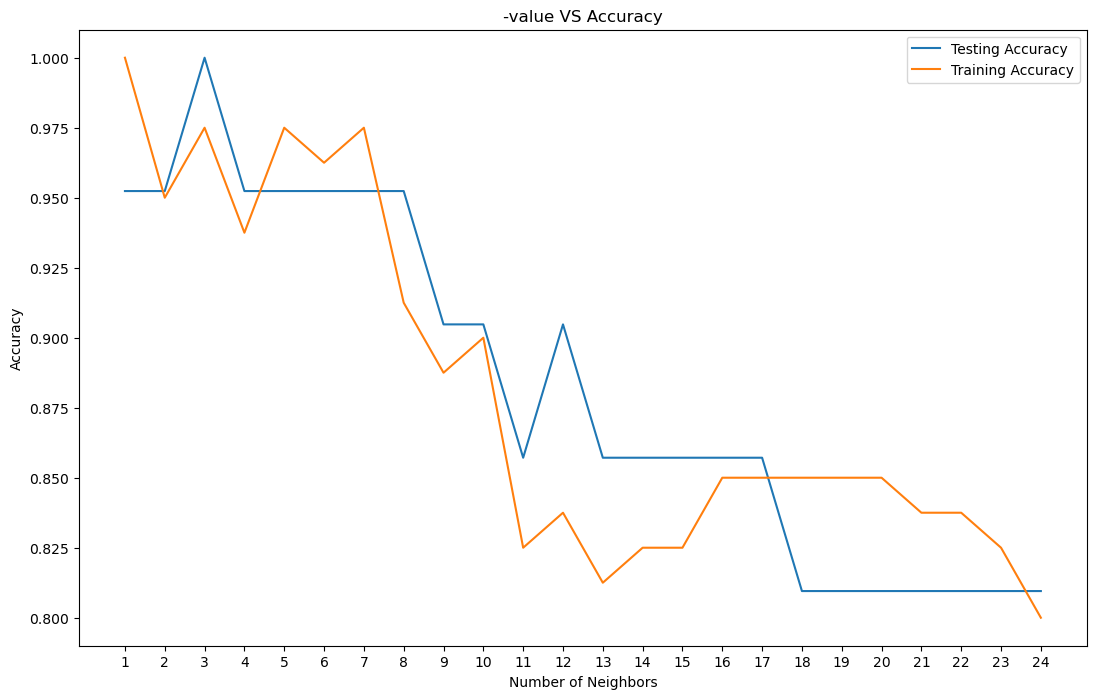

Best accuracy is 1.0 with K = 3


In [53]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
import statsmodels.api as sm

model = smf.ols('type~hair+feathers+eggs+milk+airborne+aquatic+predator+toothed+backbone+breathes+venomous+fins+legs+tail+domestic+catsize',data=z).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()